In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer

 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html

In [2]:
x = np.arange(14)
df = pd.DataFrame({'x': x, 'p': 15-x})
df['y'] = 1e4/df['p']

In [3]:
ysc = StandardScaler()

In [4]:
ysc = RobustScaler()

In [5]:
ysc = FunctionTransformer(func=np.log, inverse_func=np.exp, check_inverse=True)

In [6]:
ysc = make_pipeline(
          FunctionTransformer(func=lambda x: x/(x+1), inverse_func=lambda x: x/(1-x), check_inverse=True),
          StandardScaler()
)

In [7]:
ysc.fit(df[['y']])

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x0000025A33E09F78>,
                                     inverse_func=<function <lambda> at 0x0000025A33E09E58>)),
                ('standardscaler', StandardScaler())])

In [8]:
df['yn'] = ysc.transform(df[['y']])

In [9]:
ysc.transform(df[['y']])

array([[-1.61180723],
       [-1.36403501],
       [-1.1162133 ],
       [-0.86834208],
       [-0.62042135],
       [-0.37245108],
       [-0.12443127],
       [ 0.12363812],
       [ 0.37175708],
       [ 0.61992563],
       [ 0.8681438 ],
       [ 1.11641159],
       [ 1.36472901],
       [ 1.61309609]])

In [10]:
ysc.inverse_transform(df[['yn']])

array([[ 666.66666667],
       [ 714.28571429],
       [ 769.23076923],
       [ 833.33333333],
       [ 909.09090909],
       [1000.        ],
       [1111.11111111],
       [1250.        ],
       [1428.57142857],
       [1666.66666667],
       [2000.        ],
       [2500.        ],
       [3333.33333333],
       [5000.        ]])

reg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1e3, epsilon=1e-3))
reg.fit(df[['p']], df['yn'])

In [11]:
reg = make_pipeline(StandardScaler(), LinearRegression())
reg.fit(df[['p']], df['yn'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [12]:
df['ynhat'] = reg.predict(df[['p']])
df['yhat'] = ysc.inverse_transform(df[['ynhat']])

In [13]:
df['yaerr'] = df['yhat'] - df['y']
df['yrerr'] = df['yaerr']/df['y']

In [14]:
reg.score(df[['p']], df['yn'])

0.9999998722172933

In [15]:
print(df)

     x   p            y        yn     ynhat         yhat     yaerr     yrerr
0    0  15   666.666667 -1.611807 -1.612451   666.551117 -0.115549 -0.000173
1    1  14   714.285714 -1.364035 -1.364382   714.214278 -0.071436 -0.000100
2    2  13   769.230769 -1.116213 -1.116313   769.207077 -0.023692 -0.000031
3    3  12   833.333333 -0.868342 -0.868243   833.361067  0.027734  0.000033
4    4  11   909.090909 -0.620421 -0.620174   909.173485  0.082576  0.000091
5    5  10  1000.000000 -0.372451 -0.372104  1000.139902  0.139902  0.000140
6    6   9  1111.111111 -0.124431 -0.124035  1111.308511  0.197400  0.000178
7    7   8  1250.000000  0.123638  0.124035  1250.249835  0.249835  0.000200
8    8   7  1428.571429  0.371757  0.372104  1428.856954  0.285525  0.000200
9    9   6  1666.666667  0.619926  0.620174  1666.944274  0.277608  0.000167
10  10   5  2000.000000  0.868144  0.868243  2000.160000  0.160000  0.000080
11  11   4  2500.000000  1.116412  1.116313  2499.750709 -0.249291 -0.000100

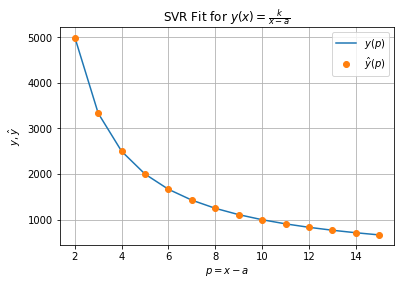

In [16]:
fig, axe = plt.subplots()
axe.plot(df['p'], df['y'], label='$y(p)$')
axe.plot(df['p'], df['yhat'], 'o', label='$\hat{y}(p)$')
axe.set_title(r"SVR Fit for $y(x) = \frac{k}{x-a}$")
axe.set_xlabel('$p = x-a$')
axe.set_ylabel('$y, \hat{y}$')
axe.legend()
axe.grid()

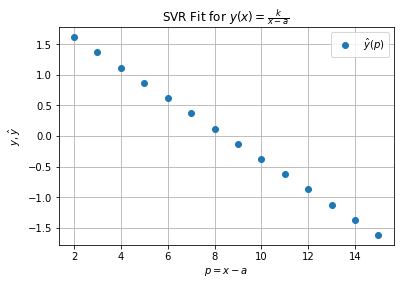

In [17]:
fig, axe = plt.subplots()
axe.plot(df['p'], df['yn'], 'o', label='$\hat{y}(p)$')
axe.set_title(r"SVR Fit for $y(x) = \frac{k}{x-a}$")
axe.set_xlabel('$p = x-a$')
axe.set_ylabel('$y, \hat{y}$')
axe.legend()
axe.grid()